In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_csv('data/Customers.csv')
products_df = pd.read_csv('data/Products.csv')
transactions_df = pd.read_csv('data/Transactions.csv')

## EDA 
- Its a hidden stiry that we are trying to reveal
- Finding patterns in the customer data
- The patterns we are looking are aggregated functions instead of a singular funcitons
- The patterns in the customer - gives an idea on the traffic, demand for the product 

<Axes: xlabel='Region'>

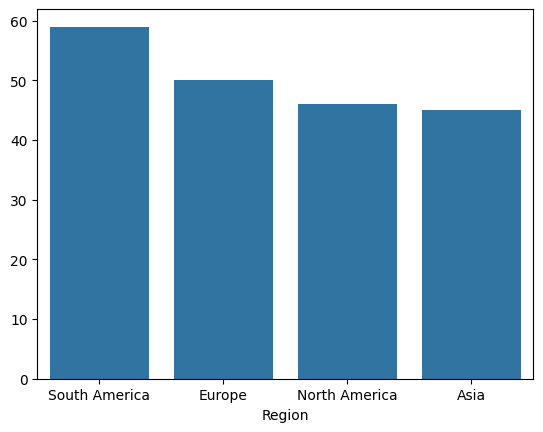

In [12]:
# Analyse transaction volume by country to identify regions with high activity
population_spread = customers_df['Region'].value_counts()
sns.barplot(x=population_spread.index, y=population_spread.values)

* Highest traffic observed from `South Africa` and `Europe`
    * Let's examine the repeat purchase rate of customers from these regions to understand sales drivers
    * This will also provide insights into traffic patterns based on customer repeat rates

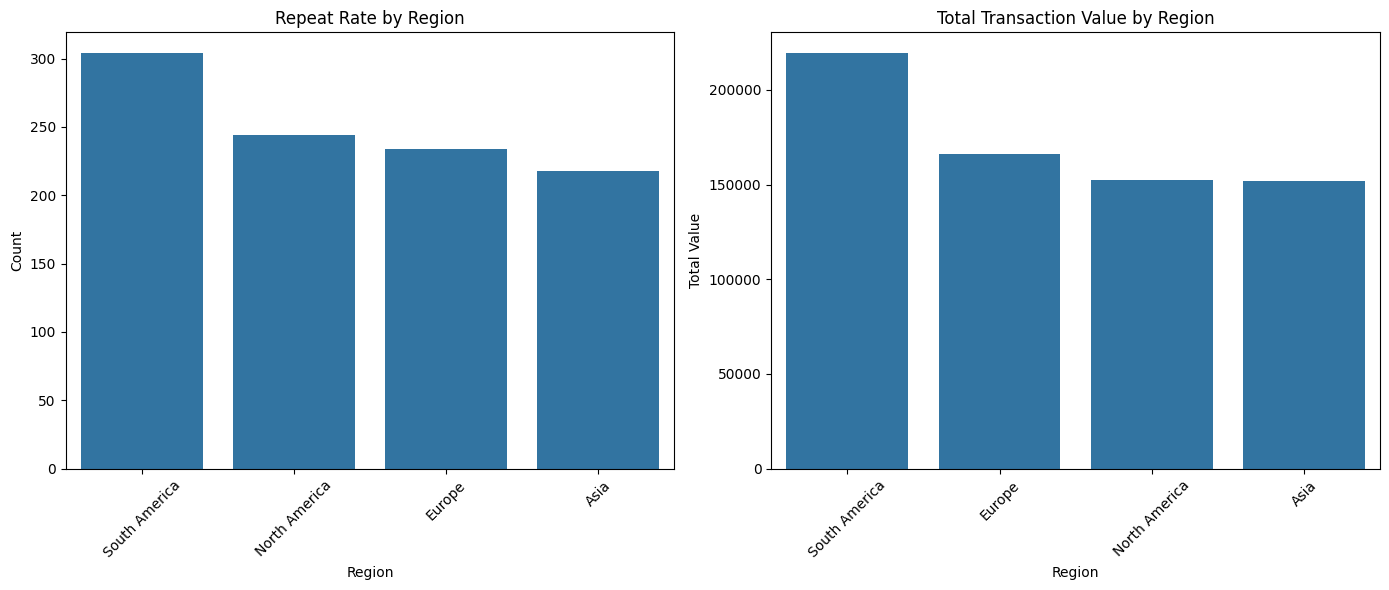

In [33]:
# Lets get the repeat rate of consumers form the countries 
combined_customer_transactions_df = pd.merge(customers_df, transactions_df, on='CustomerID', how='inner')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

repeat_rate = combined_customer_transactions_df['Region'].value_counts()
sns.barplot(x=repeat_rate.index, y=repeat_rate.values, ax=axes[0])
axes[0].set_title('Repeat Rate by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

total_value_by_region = combined_customer_transactions_df.groupby('Region')['TotalValue'].sum().reset_index()
total_value_by_region = total_value_by_region.sort_values(by='TotalValue', ascending=False)
sns.barplot(data=total_value_by_region, x='Region', y='TotalValue', ax=axes[1])
axes[1].set_title('Total Transaction Value by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* This reveals a hidden pattern in the sales by region 
    * `South America`: More repetitive customers, with highest revenue from the region 
    * `Europe`: Even though there are a good number of unique customers, they shop less frequently, but the purchasing power of these customers is high 
    * `North America`: Fewer unique customers, shop more frequently, but the average purchase size is on lower side compared to europeans
    * `Asia`: Fewer unique customers, with low repetition and low purchasing power of the customers

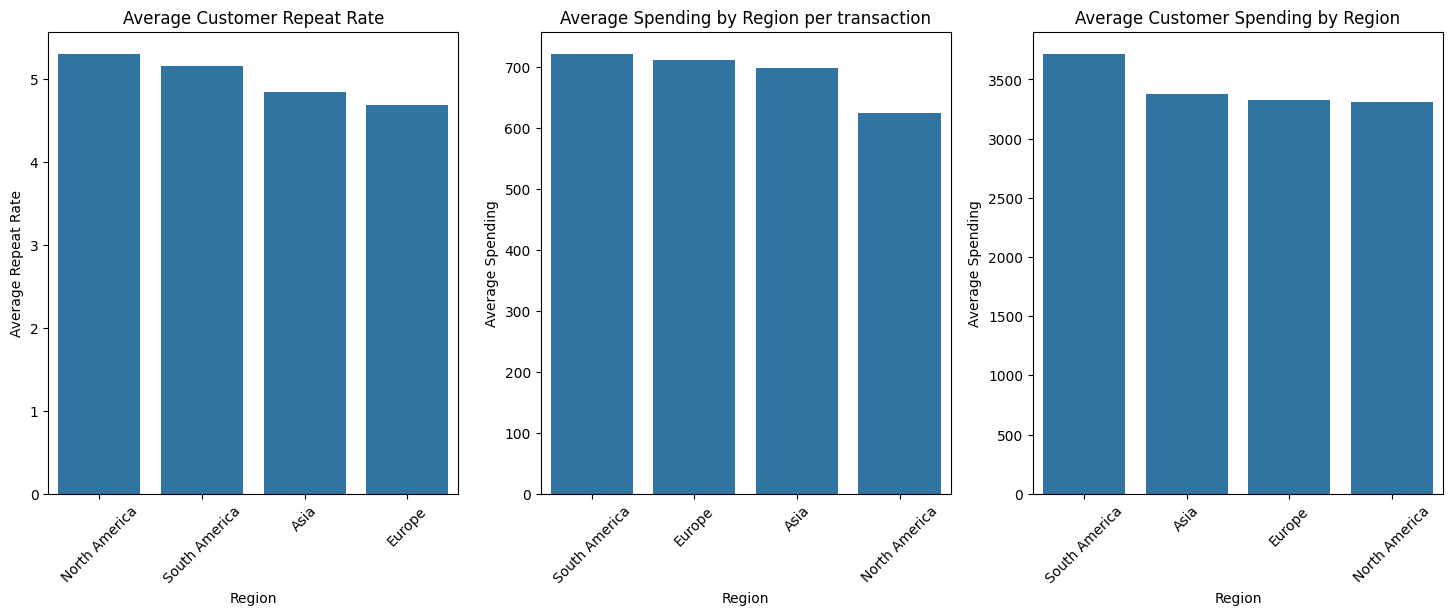

In [55]:
# Lets look at a more keep person level - to get more deeper insights on the purchasing of the customers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

average_customer_repeat_rate = combined_customer_transactions_df['Region'].value_counts() / customers_df['Region'].value_counts()
average_customer_repeat_rate = average_customer_repeat_rate.sort_values(ascending=False)
sns.barplot(x=average_customer_repeat_rate.index, y=average_customer_repeat_rate.values, ax=axes[0])
axes[0].set_title('Average Customer Repeat Rate')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Repeat Rate')
axes[0].tick_params(axis='x', rotation=45)

# Calculate average spending per transaction by region
average_spending_per_transaction = combined_customer_transactions_df.groupby('Region')['TotalValue'].sum() / combined_customer_transactions_df.groupby('Region').size()
average_spending_per_transaction = average_spending_per_transaction.sort_values(ascending=False)
sns.barplot(x=average_spending_per_transaction.index, y=average_spending_per_transaction.values, ax=axes[1])
axes[1].set_title('Average Spending by Region per transaction')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Spending')
axes[1].tick_params(axis='x', rotation=45)

# Calculate average customer spending by region
average_customer_spending = combined_customer_transactions_df.groupby('Region')['TotalValue'].sum() / customers_df.groupby('Region').size()
average_customer_spending = average_customer_spending.sort_values(ascending=False)
sns.barplot(x=average_customer_spending.index, y=average_customer_spending.values, ax=axes[2])
axes[2].set_title('Average Customer Spending by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Average Spending')
axes[2].tick_params(axis='x', rotation=45)

* What does this reveal about the data
    * `North America`: Customers come back often, but they spend the least per transaction and overall.
        * They shop frequently in small amounts, leading to lower total spending.
    * `South America`: Similar repeat rate to North America, but they spend more per transaction and overall.
        * They shop often, buy more expensive items each time, and spend more than customers in other regions.
    * `Asia`: Customers don't come back often, but their spending is almost as high as in South America and Europe.
        * Even with fewer customers, each one spends a lot more than those in Europe and North America.        * This is due to a small group of wealthy customers.
    * `Europe`: Customers don't shop often, but they spend a lot when they do, although overall performance isn't the best.

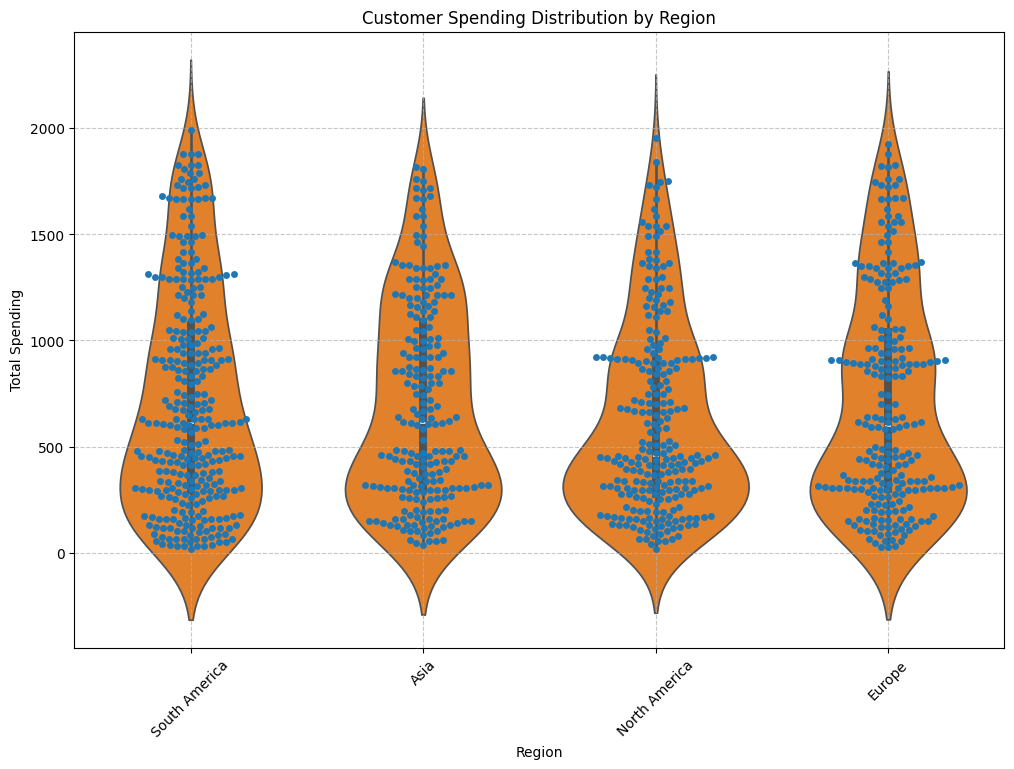

In [72]:
# Create a box plot to analyze the distribution of customer spending by region
plt.figure(figsize=(12, 8))
sns.swarmplot(data=combined_customer_transactions_df, x='Region', y='TotalValue')
sns.violinplot(data=combined_customer_transactions_df, x='Region', y='TotalValue')
plt.title('Customer Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* Insights from the plot:
    * `Asia`: The market is primarily driven by the middle class, with many individuals spending around the average.
    * `North America`: A large portion of spenders are on the lower end of the spending scale.
    * `South America and Europe`: There is a balance between different spending classes.

In [73]:
customers_df

,CustomerID,CustomerName,Region,SignupDate,Year
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022
...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,2022
196,C0197,Christina Harvey,Europe,2023-03-21,2023
197,C0198,Rebecca Ray,Europe,2022-02-27,2022
198,C0199,Andrea Jenkins,Europe,2022-12-03,2022


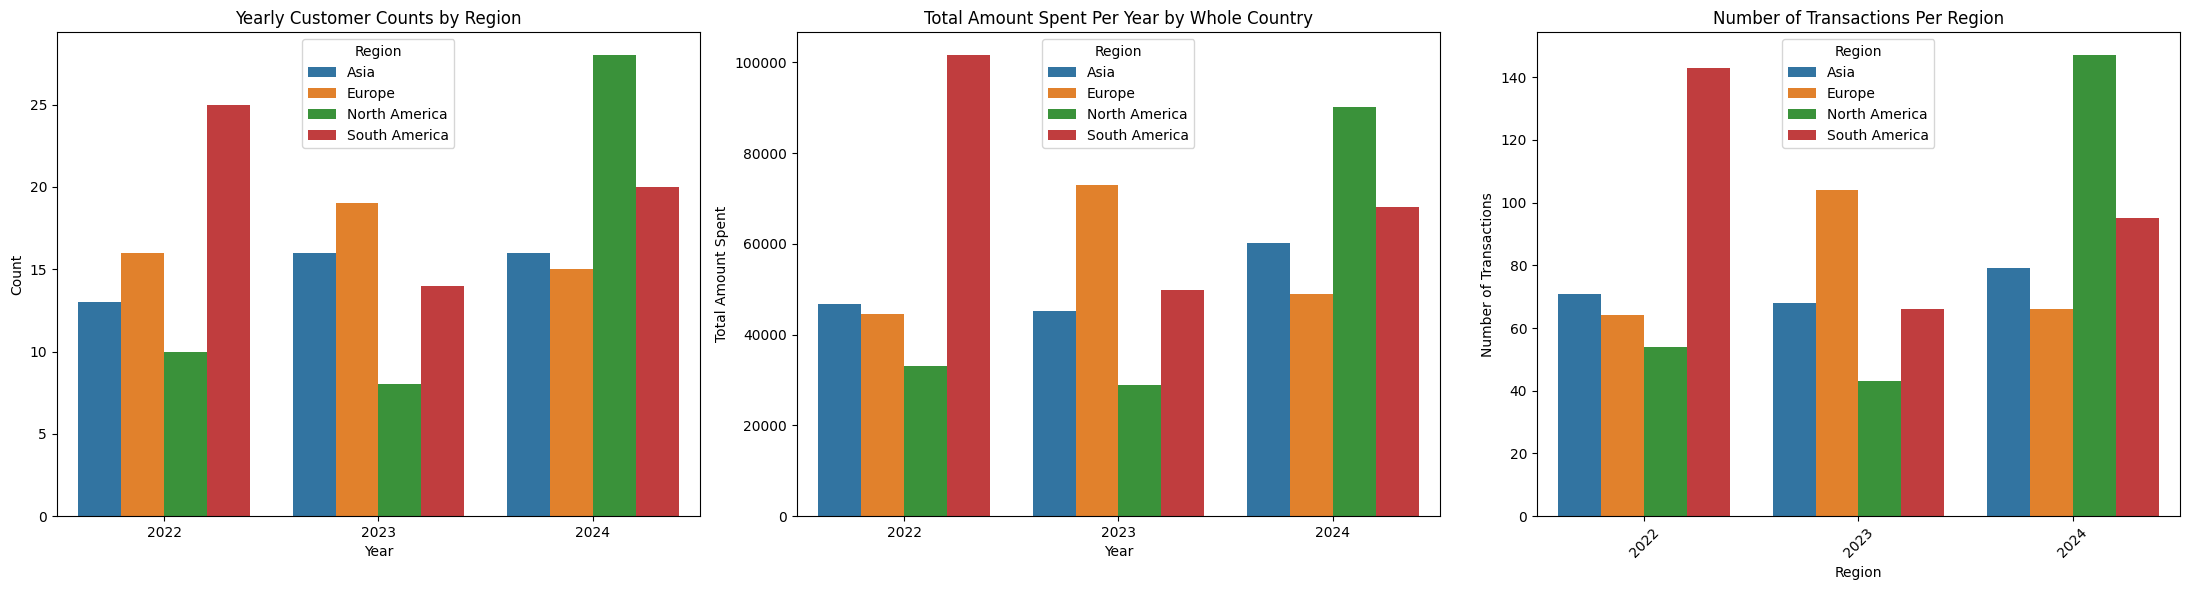

In [84]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['Year'] = customers_df['SignupDate'].dt.to_period('Y')

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Default plot: Yearly customer counts by region
yearly_counts = customers_df.groupby(['Region', 'Year']).size().reset_index(name='Count')
sns.barplot(data=yearly_counts, x='Year', y='Count', hue='Region', ax=axes[0])
axes[0].set_title('Yearly Customer Counts by Region')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Plot 1: Total amount spent per year by whole country
total_spent_per_year = combined_customer_transactions_df.groupby(['Year', 'Region'])['TotalValue'].sum().reset_index()
sns.barplot(data=total_spent_per_year, x='Year', y='TotalValue', ax=axes[1], hue='Region')
axes[1].set_title('Total Amount Spent Per Year by Whole Country')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Amount Spent')

# Plot 2: Number of transactions per region
transactions_per_region = combined_customer_transactions_df.groupby(['Year', 'Region']).size().reset_index(name='TransactionCount')
sns.barplot(data=transactions_per_region, x='Year', y='TransactionCount', hue='Region', ax=axes[2])
axes[2].set_title('Number of Transactions Per Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Number of Transactions')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* This pattern reveals:
    * `North American` customers have significantly increased their total spending and transactions over the years.
        * This indicates signs of a growing market.
    * `Europe and Asia` demonstrate consistency in both user numbers and purchases over the years.
    * `South American` customers have shown a decline in both total spending and transactions over the years.
        * This suggests inconsistency in market trends and a potential loss of customers.

<Axes: xlabel='Price', ylabel='Count'>

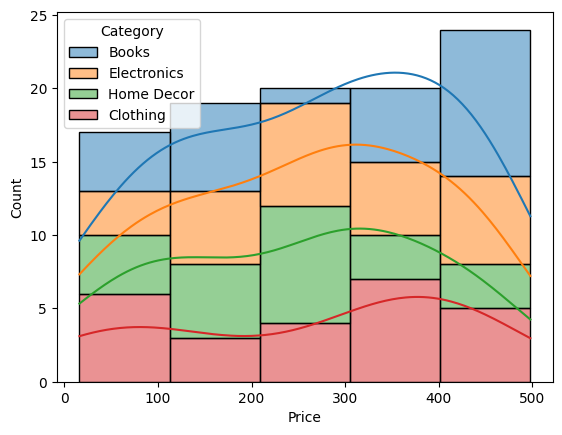

In [90]:
# Lets deal with some products
sns.histplot(data=products_df, x='Price', bins=5, hue='Category', multiple='stack', kde=True)

* The analysis shows:
    * `Clothing` is available across all price ranges.
    * `Home` decor primarily targets the mid-range segment.
    * `Book` are priced at both the high and low ends.
        * Books have a significant presence in the high price range of 400-500, indicating a notable trend.
    * `Electronics` are concentrated in the mid to high price range.

<Axes: xlabel='Category', ylabel='Price'>

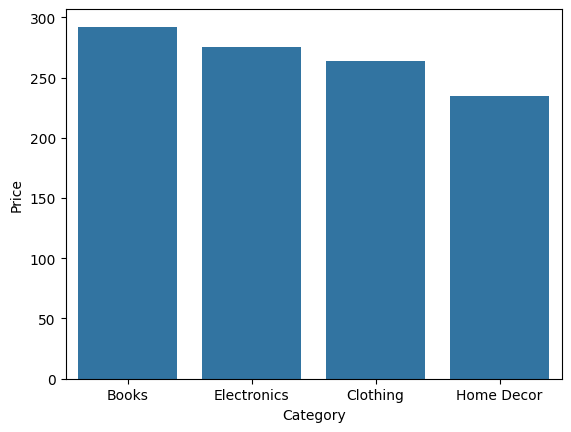

In [122]:
average_product_price_by_category = products_df.groupby('Category')['Price'].mean().reset_index()
average_product_price_by_category = average_product_price_by_category.sort_values(by='Price', ascending=False)
sns.barplot(average_product_price_by_category, x='Category', y='Price')

#### `Books > Electronics > Clothing > Home Decor`

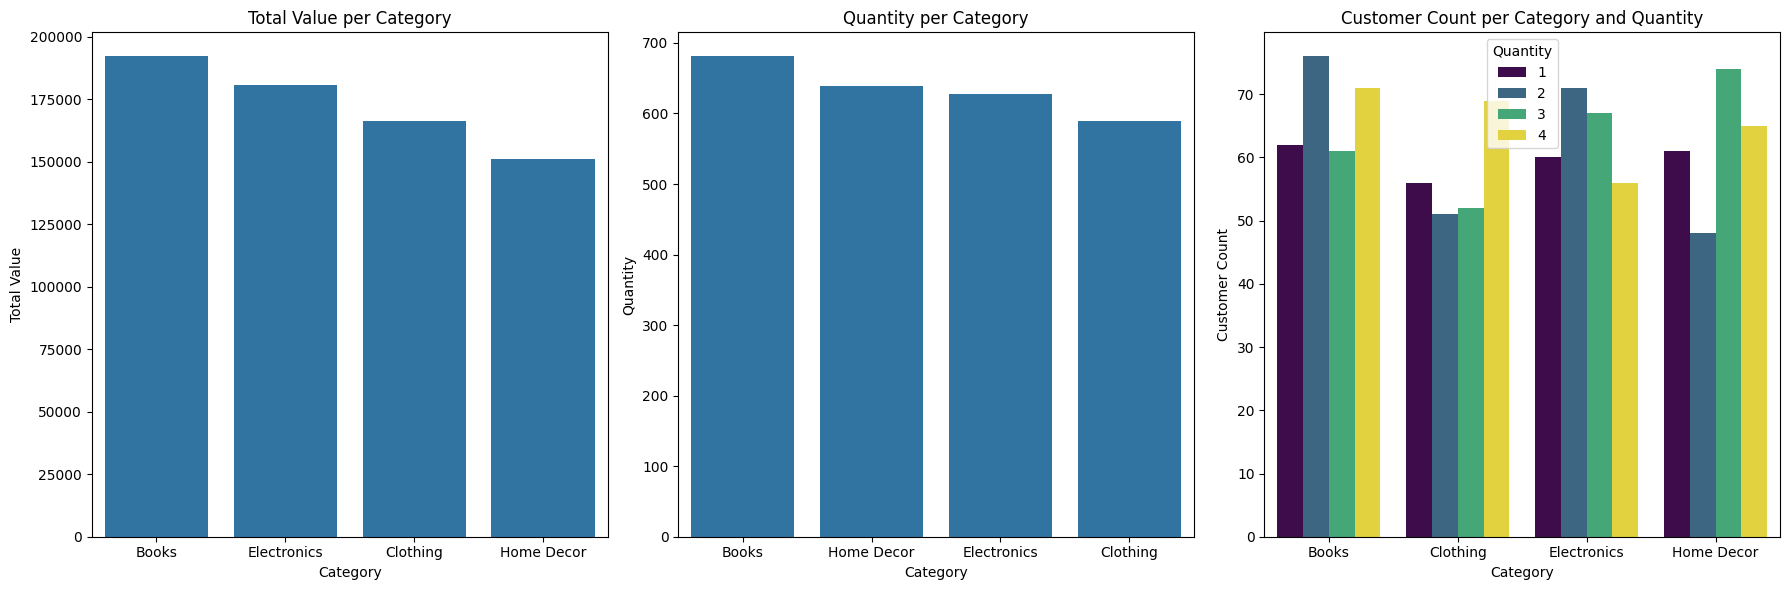

In [155]:
combined_products_transactions_df = pd.merge(products_df, transactions_df, on="ProductID", how="inner", suffixes=('', '_products'))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total value per category
total_value_per_category = combined_products_transactions_df.groupby('Category')['TotalValue'].sum().reset_index()
total_value_per_category = total_value_per_category.sort_values(by='TotalValue', ascending=False)
sns.barplot(data=total_value_per_category, x='Category', y='TotalValue', ax=axes[0])
axes[0].set_title('Total Value per Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Value')

# Quantity per category
quantity_per_category = combined_products_transactions_df.groupby('Category')['Quantity'].sum().reset_index()
quantity_per_category = quantity_per_category.sort_values(by='Quantity', ascending=False)
sns.barplot(data=quantity_per_category, x='Category', y='Quantity', ax=axes[1])
axes[1].set_title('Quantity per Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Quantity')

# Customer count per category and quantity
customer_count_per_category_quantity = combined_products_transactions_df.groupby(['Category', 'Quantity'])['CustomerID'].count().reset_index()
sns.barplot(data=customer_count_per_category_quantity, x='Category', y='CustomerID', hue='Quantity', ax=axes[2], palette="viridis")
axes[2].set_title('Customer Count per Category and Quantity')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Customer Count')

plt.tight_layout()
plt.show()

* Analysis
    * `Books` dominate total sales among all categories.
        * Over the years, the volume of books sold surpasses other categories.
        * High sales are driven by customers frequently purchasing multiple books per transaction.
    * `Clothing` 
        * Like books, customers often buy several clothing items in one purchase.
        * Despite this, the lower average price of clothing results in reduced total sales.
    * `Electronics`
       * It's uncommon for customers to buy multiple electronics in a single transaction.
        * Nevertheless, electronics achieve robust sales, ranking just below books.

In [131]:
combined_customer_products_transactions_df = pd.merge(customers_df, pd.merge(products_df, transactions_df, on="ProductID", how="inner", suffixes=('', '_products')), on="CustomerID", how="inner", suffixes=('', '_customers'))

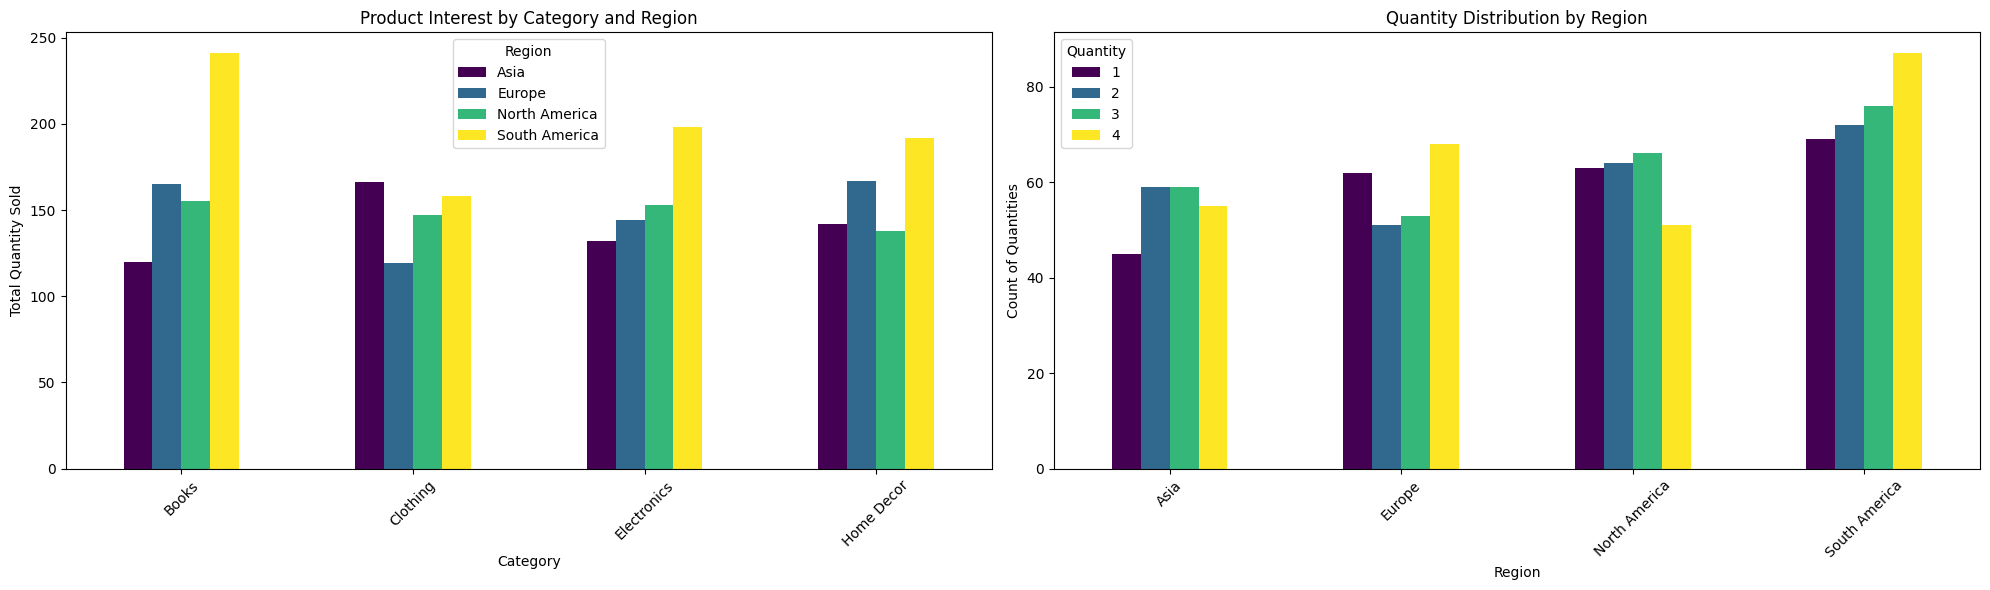

In [164]:
# Analyze product interest by country using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for Product Interest by Category and Region
category_region_counts = combined_customer_products_transactions_df.groupby(['Category', 'Region'])['Quantity'].sum().unstack()
category_region_counts.plot(kind='bar', stacked=False, ax=axes[0], colormap="viridis")
axes[0].set_title('Product Interest by Category and Region')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Quantity Sold')
axes[0].legend(title='Region')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Quantity Distribution by Region
region_quantity_counts = combined_customer_products_transactions_df.groupby(['Region', 'Quantity'])['Quantity'].count().unstack()
region_quantity_counts.plot(kind='bar', stacked=False, ax=axes[1], colormap="viridis")
axes[1].set_title('Quantity Distribution by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count of Quantities')
axes[1].legend(title='Quantity')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [166]:
average_quantity_per_region = combined_customer_products_transactions_df.groupby(['Region'])['Quantity'].mean()
average_quantity_per_region


Region
Asia             2.568807
Europe           2.542735
North America    2.430328
South America    2.595395
Name: Quantity, dtype: float64

* Analysis
    * `South americans` purchase highest amount of `books and electronics`
    * `Asia` purchases less of books and more of clothing
    * `South Americans` prefer to purchase in multiple quantities more
        * Quite oppostite to the case of `North Americans`

In [133]:
combined_customer_products_transactions_df

,CustomerID,CustomerName,Region,SignupDate,Year,ProductID,ProductName,Category,Price,TransactionID,TransactionDate,Quantity,TotalValue,Price_products
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,P022,HomeSense Wall Art,Home Decor,137.54,T00932,2024-09-17 09:01:18,3,412.62,137.54
1,C0001,Lawrence Carroll,South America,2022-07-10,2022,P029,TechPro Headphones,Electronics,433.64,T00436,2024-11-02 17:04:16,3,1300.92,433.64
2,C0001,Lawrence Carroll,South America,2022-07-10,2022,P054,SoundWave Cookbook,Books,57.30,T00015,2024-01-19 03:12:55,2,114.60,57.30
3,C0001,Lawrence Carroll,South America,2022-07-10,2022,P083,ActiveWear Smartwatch,Electronics,455.72,T00445,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,2022,P096,SoundWave Headphones,Electronics,307.47,T00085,2024-04-08 00:01:00,2,614.94,307.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,2023,P034,HomeSense T-Shirt,Clothing,217.05,T00518,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,2023,P048,TechPro Cookbook,Books,416.40,T00771,2024-09-10 09:50:48,4,1665.60,416.40
997,C0200,Kelly Cross,Asia,2023-06-11,2023,P057,ActiveWear Smartphone,Electronics,239.70,T00091,2024-04-27 19:06:20,1,239.70,239.70
998,C0200,Kelly Cross,Asia,2023-06-11,2023,P061,HomeSense Desk Lamp,Home Decor,156.96,T00731,2024-07-15 20:36:28,4,627.84,156.96
